<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [33]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [34]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [35]:
df['ConvertedCompYearly'].isnull().sum()

np.int64(42002)

In [36]:
# Skewed positive use median for missing values

skew_value = df['ConvertedCompYearly'].skew()
print(f"Coefficient d'asymétrie : {skew_value:.2f}")

Coefficient d'asymétrie : 52.92


/tmp/ipykernel_300/519203697.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_value, inplace=True)  # Replace NaN with mean value


Missing values replaced with median: 65,000.00


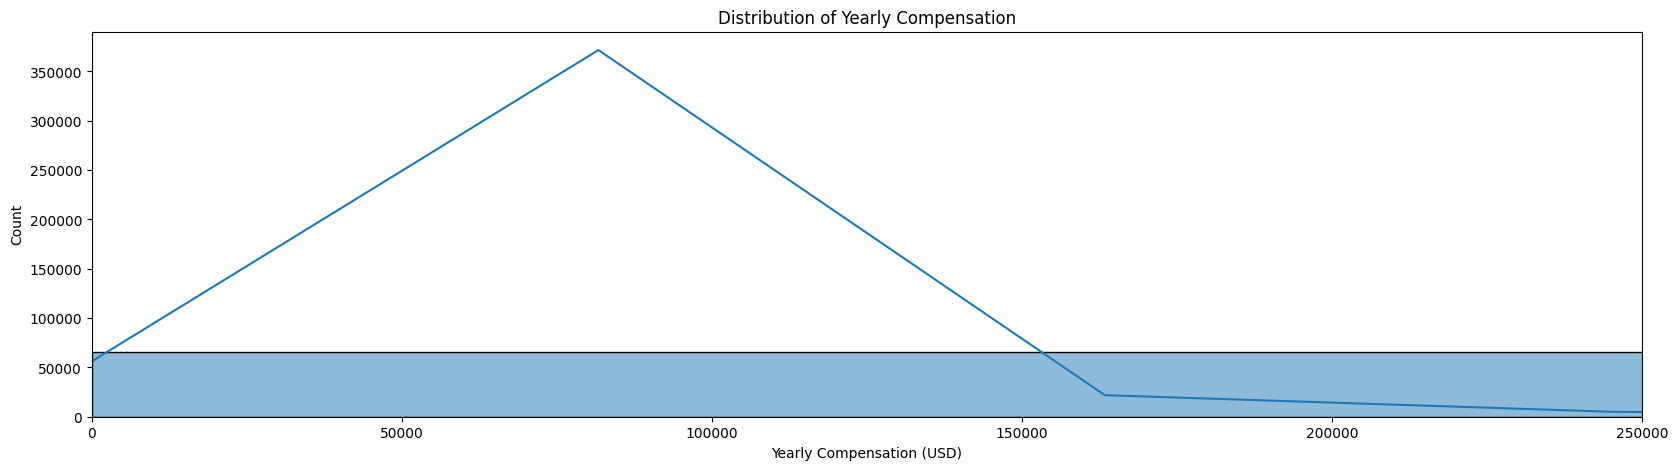

In [45]:
# Replacing missing values with mean

median_value = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_value, inplace=True)  # Replace NaN with mean value

print(f"Missing values replaced with median: {median_value:,.2f}")

# Plot histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(20, 5))
sns.histplot(df['ConvertedCompYearly'], bins=30, kde=True)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Count')
plt.title('Distribution of Yearly Compensation')
plt.xlim([0, df['ConvertedCompYearly'].quantile(0.99)])  # Limit to 99th percentile for better visualization
plt.show()

In [39]:
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
65000.0     42039
64444.0       321
53703.0       308
75184.0       230
85925.0       226
            ...  
9711.0          1
950000.0        1
51448.0         1
447569.0        1
4738.0          1
Name: count, Length: 6113, dtype: int64

**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [46]:

# Filter for full-time employed respondents
full_time_df = df[df['Employment'] == "Employed, full-time"]
full_time_df['ConvertedCompYearly'].value_counts()
# Calculate the median yearly compensation
median_comp = full_time_df['ConvertedCompYearly'].median()

print(f"Median Yearly Compensation for Full-Time Employees: ${median_comp:,.2f}")

Median Yearly Compensation for Full-Time Employees: $65,000.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



/tmp/ipykernel_300/1814912577.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_filtered, palette='viridis')


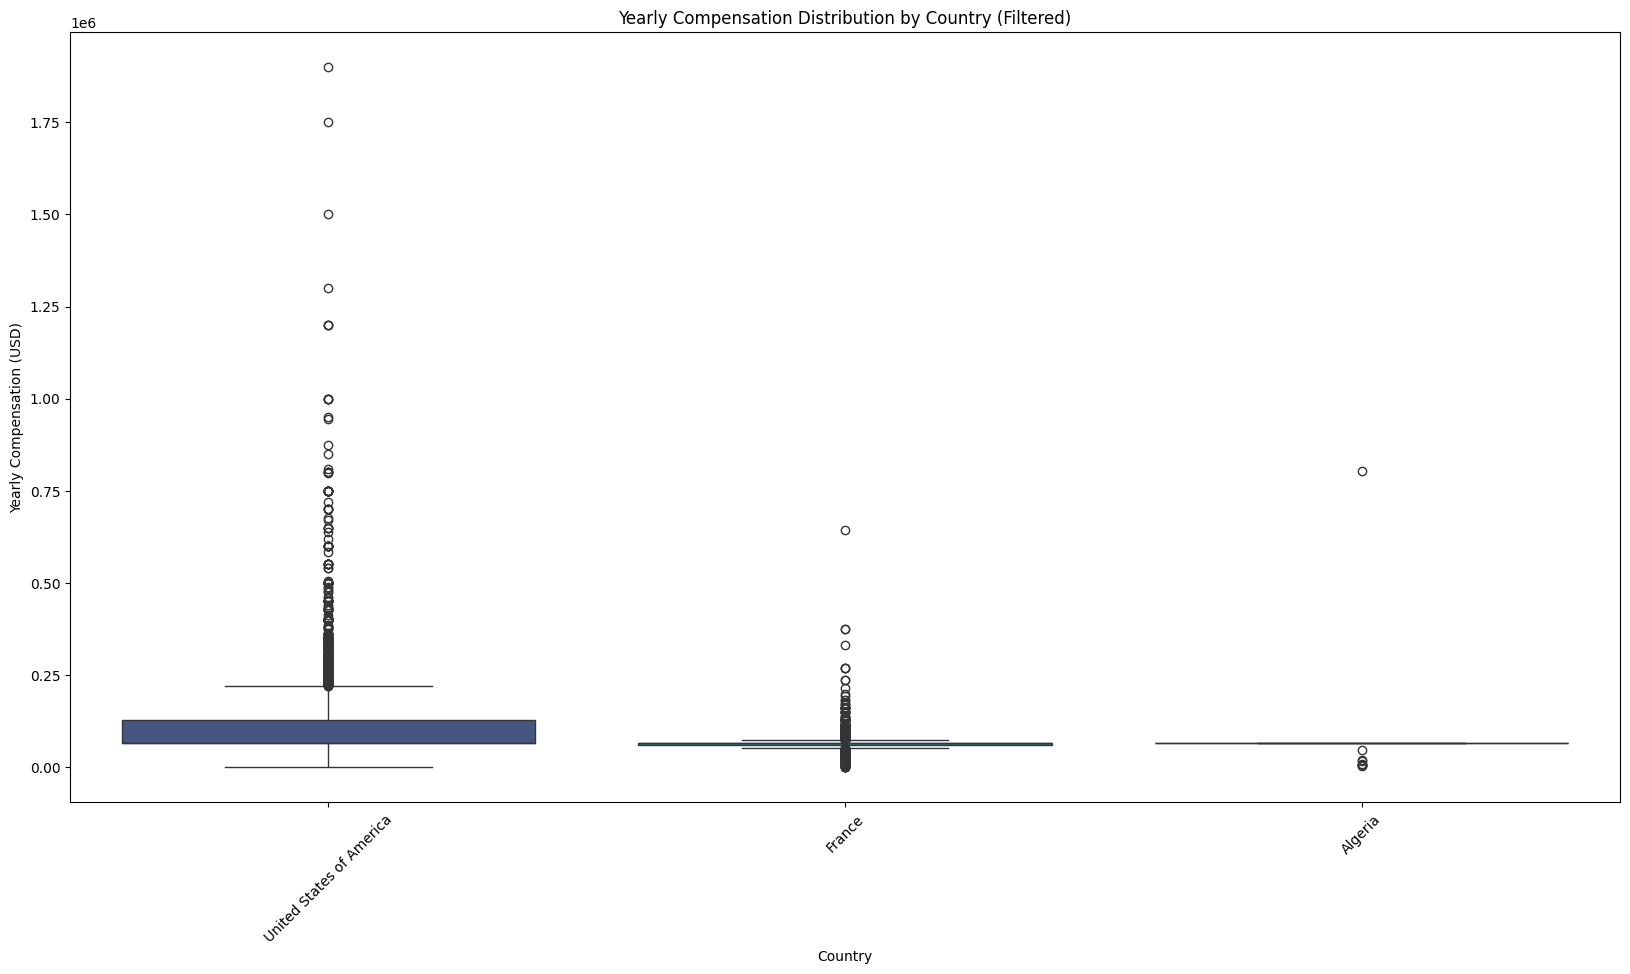

In [53]:


# Filtrer les pays spécifiques, par exemple 'United States' et 'France'
countries_to_filter = ['Algeria', 'France','United States of America']  # Liste des pays à filtrer
df_filtered = df[df['Country'].isin(countries_to_filter)]

# Créer le boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_filtered, palette='viridis')

# Rotation des labels pour plus de lisibilité
plt.xticks(rotation=45)

plt.xlabel('Country')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Yearly Compensation Distribution by Country (Filtered)')
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [54]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by filtering out the outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Show the shape of the new DataFrame
print(f"Original dataset shape: {df.shape}")
print(f"Refined dataset shape (without outliers): {df_no_outliers.shape}")


Original dataset shape: (65437, 114)
Refined dataset shape (without outliers): (42039, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


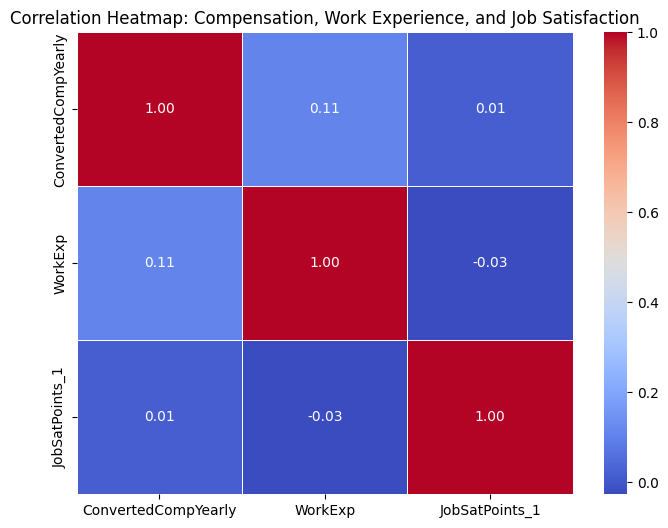

In [55]:

# Select relevant columns for correlation calculation
correlation_data = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction')
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [ ]:
## Write your code here

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
